In [56]:
from tensorflow.keras.layers import Dense , Dropout ,Input , LSTM, Activation, concatenate, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras import initializers

import librosa
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

In [2]:
file_paths = os.listdir('train/')

voices = []
for i in file_paths :
    voices.append(librosa.load('train/' + i))

voices = np.array(voices)
voices.shape


(1994, 2)

In [3]:
males_label = []
males_voices = []

females_label = []
females_voices = []

for i in range(1994) : 
    if file_paths[i][4] == "M" : 
        males_label.append(file_paths[i])
        males_voices.append(voices[i])

    elif file_paths[i][4] == "F" : 
        females_label.append(file_paths[i])
        females_voices.append(voices[i])



<AxesSubplot:title={'center':'Females'}>

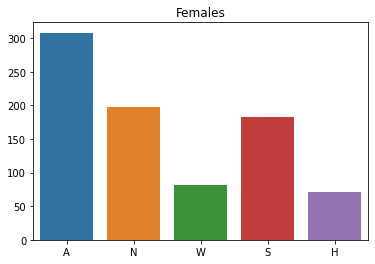

In [4]:

dictionary = { 'A' : 0, 'N' : 0, 'W' : 0, 'S' : 0, 'H' : 0}


for i in range(len(females_label)) : 
    dictionary[females_label[i][5]] += 1

plt.title('Females')
sns.barplot(list(dictionary.keys()), list(dictionary.values()))

<AxesSubplot:title={'center':'Males'}>

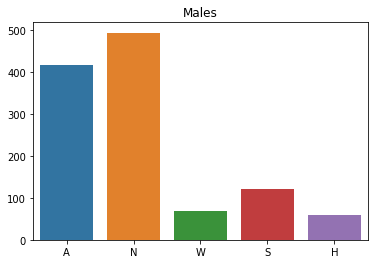

In [6]:

dictionary = { 'A' : 0, 'N' : 0, 'W' : 0, 'S' : 0, 'H' : 0}


for i in range(len(males_label)) : 
    dictionary[males_label[i][5]] += 1

plt.title('Males')
sns.barplot(list(dictionary.keys()), list(dictionary.values()))

<AxesSubplot:title={'center':'Males And Females'}>

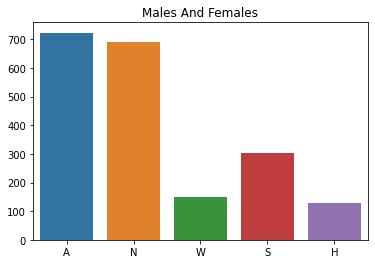

In [7]:

dictionary = { 'A' : 0, 'N' : 0, 'W' : 0, 'S' : 0, 'H' : 0}


for i in range(len(file_paths)) : 
    dictionary[file_paths[i][5]] += 1

plt.title('Males And Females')
sns.barplot(list(dictionary.keys()), list(dictionary.values()))

In [148]:
x = voices.copy()
labels = file_paths.copy()

x_feature = []
for i in range(len(x)) : 
    mfcc = np.mean(librosa.feature.mfcc(y=x[i][0], sr=x[i][1], n_mfcc=72).T,axis=0)
    x_feature.append(mfcc)

# feature2 = []
# for i in range(len(data)) : 
#    cens = np.mean(librosa.feature.chroma_cens(y=data[i][0], sr=data[i][1], n_chroma=36).T,axis=0)
#    feature2.append(cens)




x_feature = np.array(x_feature)
x_feature = x_feature.reshape((len(x_feature), 72, 1))

# feature2 = np.array(feature2)
# feature2 = feature2.reshape((len(feature2), 36, 1))

# features = np.concatenate([feature1, feature2], axis=2)

In [149]:
y=[]
y_dict = {'A' : [1, 0, 0, 0, 0], 'N' : [0, 1, 0, 0, 0], 'S' : [0, 0, 1, 0, 0], 'H' : [0, 0, 0, 1, 0], 'W' : [0, 0, 0, 0, 1], }
for i in range(len(labels)) : 
    y.append(y_dict[labels[i][5]])    
y = np.array(y)

In [150]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


x_train, x_valid, y_train, y_valid = train_test_split(x_feature, y, test_size=0.2, random_state=50)


x_train = x_train.reshape((len(x_train), 72))
x_valid = x_valid.reshape((len(x_valid), 72))
min_max_scaler = preprocessing.MinMaxScaler()
x_train, x_valid = min_max_scaler.fit_transform(x_train), min_max_scaler.fit_transform(x_valid)
x_train = x_train.reshape((len(x_train), 72, 1))
x_valid = x_valid.reshape((len(x_valid), 72, 1))







(671, 36, 1)

Epoch 1/50
25/25 [==============================] - 14s 555ms/step - loss: 1.7509 - accuracy: 0.3818 - val_loss: 1.7001 - val_accuracy: 0.3484
Epoch 2/50
25/25 [==============================] - 11s 435ms/step - loss: 1.5492 - accuracy: 0.4840 - val_loss: 1.4244 - val_accuracy: 0.5639
Epoch 3/50
25/25 [==============================] - 12s 483ms/step - loss: 1.3500 - accuracy: 0.5774 - val_loss: 1.2899 - val_accuracy: 0.5865
Epoch 4/50
25/25 [==============================] - 13s 502ms/step - loss: 1.2479 - accuracy: 0.5956 - val_loss: 1.4163 - val_accuracy: 0.5338
Epoch 5/50
25/25 [==============================] - 11s 456ms/step - loss: 1.2090 - accuracy: 0.5981 - val_loss: 1.2109 - val_accuracy: 0.6090
Epoch 6/50
25/25 [==============================] - 11s 445ms/step - loss: 1.1764 - accuracy: 0.6194 - val_loss: 1.1885 - val_accuracy: 0.5940
Epoch 7/50
25/25 [==============================] - 12s 462ms/step - loss: 1.1442 - accuracy: 0.6263 - val_loss: 1.3247 - val_accuracy: 0.5439

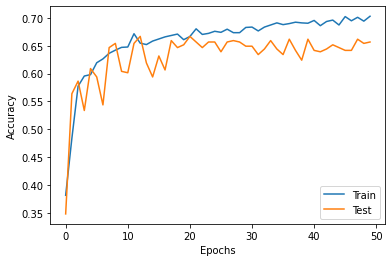

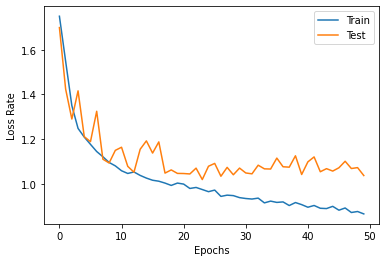

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2


# #Plain LSTM :: Accuracy : 60 & GRU :: 60
# model = Sequential()
# model.add(LSTM(36, return_sequences=False, activation='tanh', input_shape=(36, 1), kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01)))
# #model.add(GRU(36, return_sequences=False, activation='tanh', input_shape=(36, 1), kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01)))
# model.add(Dense(48, activation='tanh'))
# #model.add(BatchNormalization())
# model.add(Dense(24, activation='tanh'))
# model.add(Dense(12, activation='tanh'))
# model.add(Dense(5, activation='softmax'))

##Bidirectional LSTM :: Accuracy : 65 & GRU : 61
model = Sequential()
model.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh', input_shape=(72, 1), kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))))
model.add(Bidirectional(LSTM(72, activation='tanh')))
# model.add(Bidirectional(GRU(36, return_sequences=True, activation='tanh', input_shape=(36, 1), kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))))
# model.add(Bidirectional(GRU(36, activation='tanh')))
model.add(Dense(68, activation='tanh'))
#model.add(BatchNormalization())
model.add(Dense(36, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(5, activation='softmax'))

# ### simple and more complex RNN : Simple :: 62 acc!    more complex : 
# model = Sequential()
# #model.add(SimpleRNN(32, return_sequences=False, activation='tanh', input_shape=(36, 1), kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))) ## SimpleOne
# model.add(SimpleRNN(32, return_sequences=True, activation='tanh', input_shape=(36, 1), kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01)))
# model.add(SimpleRNN(24, return_sequences=False, activation='tanh'))
# #model.add(SimpleRNN(16, return_sequences=False, activation='tanh'))

# model.add(Dense(28, activation='tanh'))
# #model.add(BatchNormalization())
# model.add(Dense(16, activation='tanh'))
# model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(x_train, y_train ,validation_data=(x_valid, y_valid), epochs=50, batch_size = 64)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Rate')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

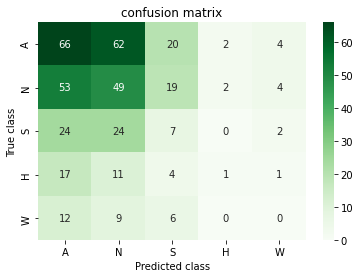

In [152]:
labels = {0 : 'A', 1 : 'N', 2 : 'S', 3 : 'H', 4 : 'W'}
def to_str(x, labels) :
    i = x.argmax()
    return labels[i]



predictions = model.predict(x_valid)
real = np.array(y).copy()

confusion1 = []
confusion2 = []

for i in range(len(x_valid)) : 
    confusion1.append(to_str(real[i], labels))
    confusion2.append(to_str(predictions[i], labels))



confusion1 = np.asarray(confusion1)
confusion2 = np.asarray(confusion2)

from sklearn.metrics import confusion_matrix

LABELS=["A", "N", "S", 'H', 'W']

conf_matrix = confusion_matrix(confusion1, confusion2, labels=LABELS)

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Greens")
plt.title("confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [162]:
test_file_names = os.listdir('test/')


test_sounds = []
for i in range(len(test_file_names)) : 
    path = 'test/'+ test_file_names[i]
    test_sounds.append(librosa.load(path))


test_mfcc = []
for i in range(len(test_sounds)) : 
    mfcc = np.mean(librosa.feature.mfcc(y=test_sounds[i][0], sr=test_sounds[i][1], n_mfcc=36).T,axis=0)
    test_mfcc.append(mfcc)


test_mfcc = np.array(test_mfcc)
test_mfcc = test_mfcc.reshape((227, 36, 1))

test_pred = model.predict(test_mfcc)
test_pred


ans = [] 
ans_dict = {}


for i in range(len(test_pred)) : 
    if test_pred[i].argmax() == 0 :  
        ans.append('A') 
    elif test_pred[i].argmax() == 1 :  
        ans.append('N') 
    elif test_pred[i].argmax() == 2 :  
        ans.append('S') 
    elif test_pred[i].argmax() == 3 :  
        ans.append('H') 
    elif test_pred[i].argmax() == 4 :  
        ans.append('W') 

answer = pd.DataFrame({'id' : np.array(test_file_names), 'class' : np.array(ans)})
answer.to_csv('test_submission.csv', index=False)


In [159]:
ans

[]